# Times Data World University Ranking Analysis

In [1]:
import pandas as pd
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
time=pd.read_csv(r'file:///C:\Users\utilisateur\Downloads\world-university-rankings\timesData.csv')


In [3]:
time.describe(include='all')

,world_rank,university_name,country,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,international_students,female_male_ratio,year
count,2603,2603,2603,2603.000000,2603,2603.000000,2603.000000,2603,2603,2544,2544.000000,2536,2370,2603.000000
unique,250,818,72,NaN,804,NaN,NaN,613,415,794,NaN,53,69,NaN
top,301-350,Vanderbilt University,United States of America,NaN,20.7,NaN,NaN,-,-,"15,920",NaN,7%,54 : 46,NaN
freq,248,6,659,NaN,10,NaN,NaN,218,1402,6,NaN,142,185,NaN
mean,NaN,NaN,NaN,37.801498,NaN,35.910257,60.921629,NaN,NaN,NaN,18.445283,NaN,NaN,2014.075682
std,NaN,NaN,NaN,17.604218,NaN,21.254805,23.073219,NaN,NaN,NaN,11.458698,NaN,NaN,1.685733
min,NaN,NaN,NaN,9.900000,NaN,2.900000,1.200000,NaN,NaN,NaN,0.600000,NaN,NaN,2011.000000
25%,NaN,NaN,NaN,24.700000,NaN,19.600000,45.500000,NaN,NaN,NaN,11.975000,NaN,NaN,2013.000000
50%,NaN,NaN,NaN,33.900000,NaN,30.500000,62.500000,NaN,NaN,NaN,16.100000,NaN,NaN,2014.000000
75%,NaN,NaN,NaN,46.400000,NaN,47.250000,79.050000,NaN,NaN,NaN,21.500000,NaN,NaN,2016.000000


In [4]:
time.head(200)

,world_rank,university_name,country,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,international_students,female_male_ratio,year
0,1,Harvard University,United States of America,99.7,72.4,98.7,98.8,34.5,96.1,"20,152",8.9,25%,NaN,2011
1,2,California Institute of Technology,United States of America,97.7,54.6,98.0,99.9,83.7,96.0,"2,243",6.9,27%,33 : 67,2011
2,3,Massachusetts Institute of Technology,United States of America,97.8,82.3,91.4,99.9,87.5,95.6,"11,074",9.0,33%,37 : 63,2011
3,4,Stanford University,United States of America,98.3,29.5,98.1,99.2,64.3,94.3,"15,596",7.8,22%,42 : 58,2011
4,5,Princeton University,United States of America,90.9,70.3,95.4,99.9,-,94.2,"7,929",8.4,27%,45 : 55,2011
5,6,University of Cambridge,United Kingdom,90.5,77.7,94.1,94.0,57.0,91.2,"18,812",11.8,34%,46 : 54,2011
6,6,University of Oxford,United Kingdom,88.2,77.2,93.9,95.1,73.5,91.2,"19,919",11.6,34%,46 : 54,2011
7,8,"University of California, Berkeley",United States of America,84.2,39.6,99.3,97.8,-,91.1,"36,186",16.4,15%,50 : 50,2011
8,9,Imperial College London,United Kingdom,89.2,90.0,94.5,88.3,92.9,90.6,"15,060",11.7,51%,37 : 63,2011
9,10,Yale University,United States of America,92.1,59.2,89.7,91.5,-,89.5,"11,751",4.4,20%,50 : 50,2011


In [5]:
time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2603 entries, 0 to 2602
Data columns (total 14 columns):
world_rank                2603 non-null object
university_name           2603 non-null object
country                   2603 non-null object
teaching                  2603 non-null float64
international             2603 non-null object
research                  2603 non-null float64
citations                 2603 non-null float64
income                    2603 non-null object
total_score               2603 non-null object
num_students              2544 non-null object
student_staff_ratio       2544 non-null float64
international_students    2536 non-null object
female_male_ratio         2370 non-null object
year                      2603 non-null int64
dtypes: float64(4), int64(1), object(9)
memory usage: 284.8+ KB


In [6]:
time = time.replace('-', np.nan)

time["international"]=time["international"].astype("float")


In [7]:
time["income"]=time["income"].astype("float64")


In [8]:
time["total_score"]=time["total_score"].astype("float64")


In [9]:
time = time.fillna(0)
time["num_students"]=time["num_students"].str.replace(',', '').astype("float64")

In [10]:
time['international_students'] = time['international_students'].str.rstrip('%').astype('float') / 100.0
time.head()

,world_rank,university_name,country,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,international_students,female_male_ratio,year
0,1,Harvard University,United States of America,99.7,72.4,98.7,98.8,34.5,96.1,20152.0,8.9,0.25,0,2011
1,2,California Institute of Technology,United States of America,97.7,54.6,98.0,99.9,83.7,96.0,2243.0,6.9,0.27,33 : 67,2011
2,3,Massachusetts Institute of Technology,United States of America,97.8,82.3,91.4,99.9,87.5,95.6,11074.0,9.0,0.33,37 : 63,2011
3,4,Stanford University,United States of America,98.3,29.5,98.1,99.2,64.3,94.3,15596.0,7.8,0.22,42 : 58,2011
4,5,Princeton University,United States of America,90.9,70.3,95.4,99.9,0.0,94.2,7929.0,8.4,0.27,45 : 55,2011


In [11]:
time.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2603 entries, 0 to 2602
Data columns (total 14 columns):
world_rank                2603 non-null object
university_name           2603 non-null object
country                   2603 non-null object
teaching                  2603 non-null float64
international             2603 non-null float64
research                  2603 non-null float64
citations                 2603 non-null float64
income                    2603 non-null float64
total_score               2603 non-null float64
num_students              2544 non-null float64
student_staff_ratio       2603 non-null float64
international_students    2536 non-null float64
female_male_ratio         2603 non-null object
year                      2603 non-null int64
dtypes: float64(9), int64(1), object(4)
memory usage: 284.8+ KB


In [12]:
country=time[['country','total_score']]
grp=country.groupby(['country'], as_index=False).mean()
grp

,country,total_score
0,Argentina,0.000000
1,Australia,23.123077
2,Austria,10.945161
3,Bangladesh,0.000000
4,Belarus,0.000000
5,Belgium,32.235135
6,Brazil,3.784000
7,Canada,27.102778
8,Chile,0.000000
9,China,13.302410


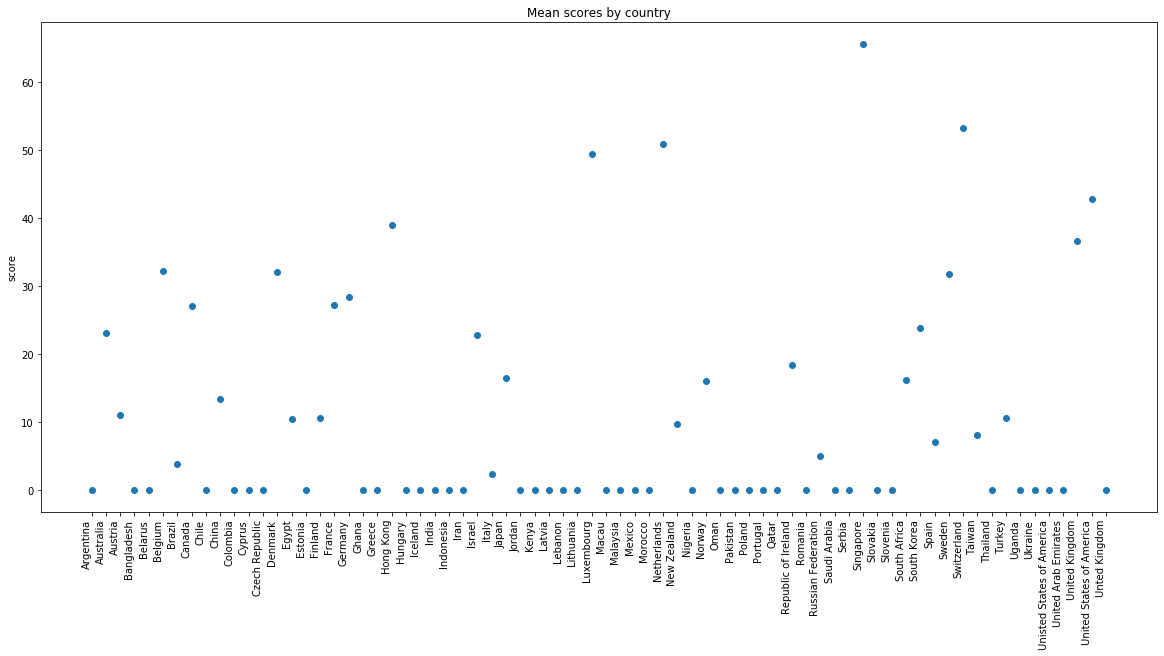

In [13]:
fig,ax = plt.subplots(figsize=(20,10))

plt.scatter(grp['country'],grp['total_score'])
fig.autofmt_xdate(rotation=90)
plt.ylabel('score')
plt.title('Mean scores by country')
plt.show()

In [14]:
x1=time[['teaching', 'international', 'research', 'citations', 'income','student_staff_ratio']]
y1=time['total_score']
import sklearn
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(x1, y1)
reg.score(x1, y1)


0.8072877392667563

In [15]:
coef=reg.coef_
intercept=reg.intercept_

intercept

-39.59060036455662

In [16]:
coef

array([ 0.44532837,  0.11239993,  0.63388258,  0.40591423, -0.02811887,
       -0.0935465 ])

In [17]:
test=['80.9','58.5','89.2','92.3','100.0','3.6']
test1=np.array(test).reshape(1,-1).astype(np.float64)
reg.predict(test1)


array([93.87141528])

In [18]:
test1=intercept+80.9*coef[0]+58.5*coef[1]+89.2*coef[2]+92.3*coef[3]+100.0*coef[4]+3.6*coef[5]
test1

93.87141528084227

In [19]:
from sklearn.model_selection import train_test_split
xTrain, xTest, yTrain, yTest = train_test_split(x1, y1, test_size = 0.2, random_state = 0)

In [20]:
reg = LinearRegression().fit(xTrain, yTrain)
reg.score(xTrain, yTrain)


0.8067091688086865

In [21]:
yhat=reg.predict(xTest)
reg.score(xTest, yTest)


0.808824146624039

Text(0, 0.5, 'Predictions')

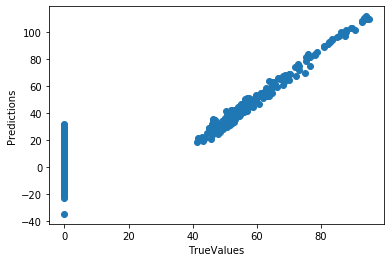

In [22]:
plt.scatter(yTest,yhat)
plt.xlabel('TrueValues')
plt.ylabel('Predictions')

In [23]:
features = ['teaching', 'international', 'research', 'citations', 'income','student_staff_ratio']
target = 'total_score'
from scipy.stats.stats import pearsonr
for feature in features:
    coeff = pearsonr(time[feature], time[target])[0]
    print (('Pearson correlation for ') + feature + (' coeff: ')+ str(coeff))

Pearson correlation for teaching coeff: 0.8159325730907789
Pearson correlation for international coeff: 0.31008332371945235
Pearson correlation for research coeff: 0.8422237406421964
Pearson correlation for citations coeff: 0.6864242982835621
Pearson correlation for income coeff: 0.13896487955742393
Pearson correlation for student_staff_ratio coeff: -0.21732641546544862


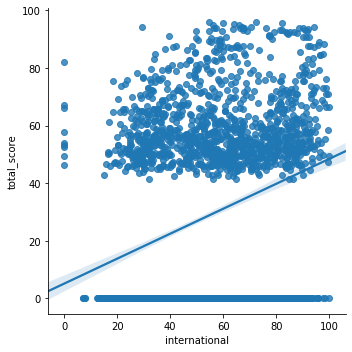

In [24]:
sns.lmplot(x="international", y="total_score", data=time)

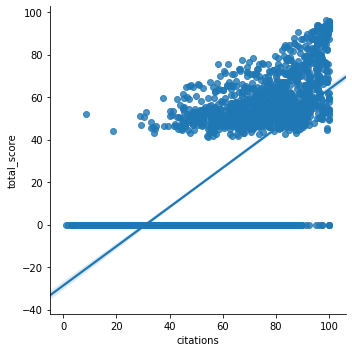

In [25]:
sns.lmplot(x="citations", y="total_score", data=time)

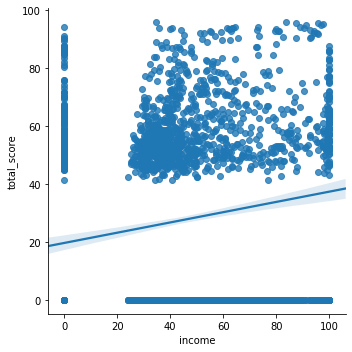

In [26]:
sns.lmplot(x="income", y="total_score", data=time)

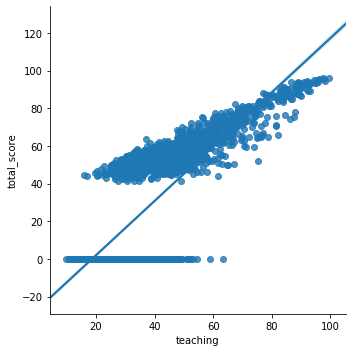

In [27]:
sns.lmplot(x="teaching", y="total_score", data=time)

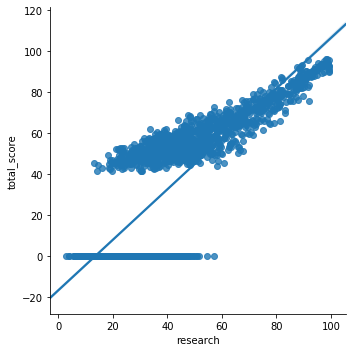

In [28]:
sns.lmplot(x="research", y="total_score", data=time)

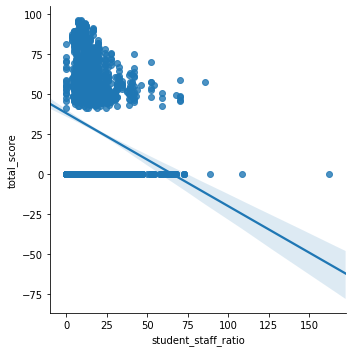

In [29]:
sns.lmplot(x="student_staff_ratio", y="total_score", data=time)

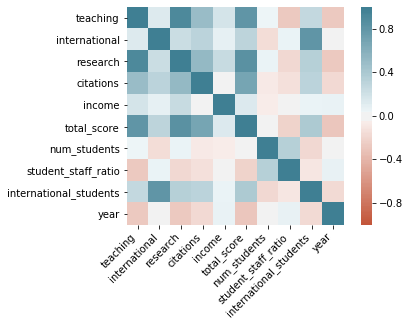

In [30]:
corr = time.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

# World University Ranking Analysis

In [31]:
cwur=pd.read_csv(r'file:///C:\Users\utilisateur\Downloads\world-university-rankings\cwurData.csv')

In [32]:
cwur.head(100)

,world_rank,institution,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year
0,1,Harvard University,USA,1,7,9,1,1,1,1,NaN,5,100.00,2012
1,2,Massachusetts Institute of Technology,USA,2,9,17,3,12,4,4,NaN,1,91.67,2012
2,3,Stanford University,USA,3,17,11,5,4,2,2,NaN,15,89.50,2012
3,4,University of Cambridge,United Kingdom,1,10,24,4,16,16,11,NaN,50,86.17,2012
4,5,California Institute of Technology,USA,4,2,29,7,37,22,22,NaN,18,85.21,2012
5,6,Princeton University,USA,5,8,14,2,53,33,26,NaN,101,82.50,2012
6,7,University of Oxford,United Kingdom,2,13,28,9,15,13,19,NaN,26,82.34,2012
7,8,Yale University,USA,6,14,31,12,14,6,15,NaN,66,79.14,2012
8,9,Columbia University,USA,7,23,21,10,13,12,14,NaN,5,78.86,2012
9,10,"University of California, Berkeley",USA,8,16,52,6,6,5,3,NaN,16,78.55,2012


In [33]:
cwur.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 14 columns):
world_rank              2200 non-null int64
institution             2200 non-null object
country                 2200 non-null object
national_rank           2200 non-null int64
quality_of_education    2200 non-null int64
alumni_employment       2200 non-null int64
quality_of_faculty      2200 non-null int64
publications            2200 non-null int64
influence               2200 non-null int64
citations               2200 non-null int64
broad_impact            2000 non-null float64
patents                 2200 non-null int64
score                   2200 non-null float64
year                    2200 non-null int64
dtypes: float64(2), int64(10), object(2)
memory usage: 240.7+ KB


In [34]:
x=cwur[['quality_of_education','alumni_employment','quality_of_faculty','publications','influence','citations','patents']]
y=cwur['score']

In [35]:
import sklearn
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(x, y)
reg.score(x, y)


0.5095396360013416

In [36]:
coef=reg.coef_
intercept=reg.intercept_

intercept

63.119675760509

In [37]:
coef

array([-0.00356959, -0.00543789, -0.06174499, -0.0007499 , -0.00025032,
       -0.00038957, -0.00168649])

In [38]:
test=['101','78','27','41','47','40','57']
test1=np.array(test).reshape(1,-1).astype(np.float64)
reg.predict(test1)

array([60.51365301])

In [39]:
test1=intercept+101*coef[0]+78*coef[1]+27*coef[2]+41*coef[3]+47*coef[4]+40*coef[5]+57*coef[6]
test1

60.513653011581894

In [40]:
from sklearn.model_selection import train_test_split
xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [41]:
reg = LinearRegression().fit(xTrain, yTrain)
reg.score(xTrain, yTrain)

0.5129840282387865

In [42]:
yhat=reg.predict(xTest)
reg.score(xTest, yTest)

0.4900250149786683

Text(0, 0.5, 'Predictions')

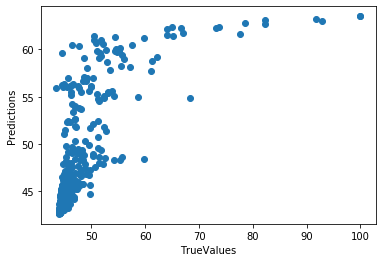

In [43]:
plt.scatter(yTest,yhat)
plt.xlabel('TrueValues')
plt.ylabel('Predictions')

In [44]:
features = ['quality_of_education','alumni_employment','quality_of_faculty','publications','influence','citations','patents']
target = 'score'
from scipy.stats.stats import pearsonr
for feature in features:
    coeff = pearsonr(cwur[feature], cwur[target])[0]
    print (('Pearson correlation for ') + feature + (' coeff: ')+ str(coeff))

Pearson correlation for quality_of_education coeff: -0.6005406287207992
Pearson correlation for alumni_employment coeff: -0.5103735958571962
Pearson correlation for quality_of_faculty coeff: -0.6935399201507381
Pearson correlation for publications coeff: -0.522111322538575
Pearson correlation for influence coeff: -0.5228372990601702
Pearson correlation for citations coeff: -0.5224383145766368
Pearson correlation for patents coeff: -0.4748099206717429


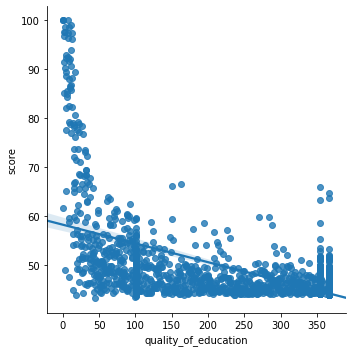

In [45]:
sns.lmplot(x="quality_of_education", y="score", data=cwur)

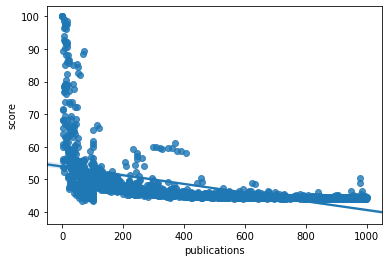

In [46]:
sns.regplot(x="publications", y="score", data=cwur)

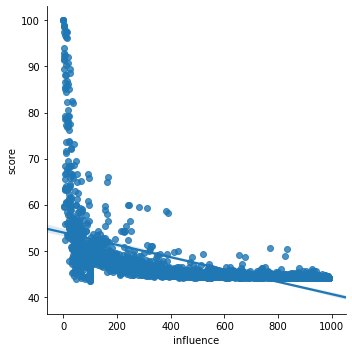

In [47]:
sns.lmplot(x="influence", y="score", data=cwur)

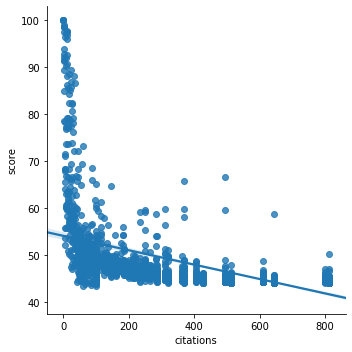

In [48]:
sns.lmplot(x="citations", y="score", data=cwur)

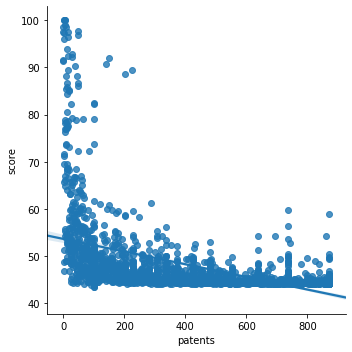

In [49]:
sns.lmplot(x="patents", y="score", data=cwur)

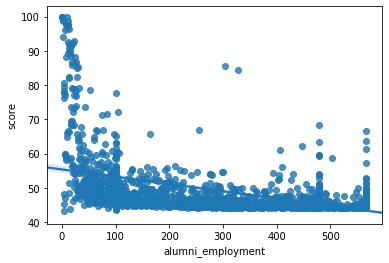

In [50]:
sns.regplot(x="alumni_employment", y="score", data=cwur)

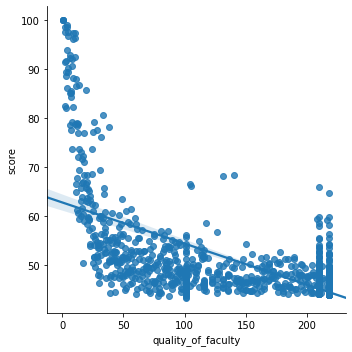

In [51]:
sns.lmplot(x="quality_of_faculty", y="score", data=cwur)

In [52]:
country=cwur[['country','score']]
group=country.groupby(['country'], as_index=False).mean()
group

,country,score
0,Argentina,44.672857
1,Australia,45.825517
2,Austria,45.139583
3,Belgium,47.011000
4,Brazil,44.781111
5,Bulgaria,44.335000
6,Canada,47.359306
7,Chile,44.767500
8,China,44.992575
9,Colombia,44.432500


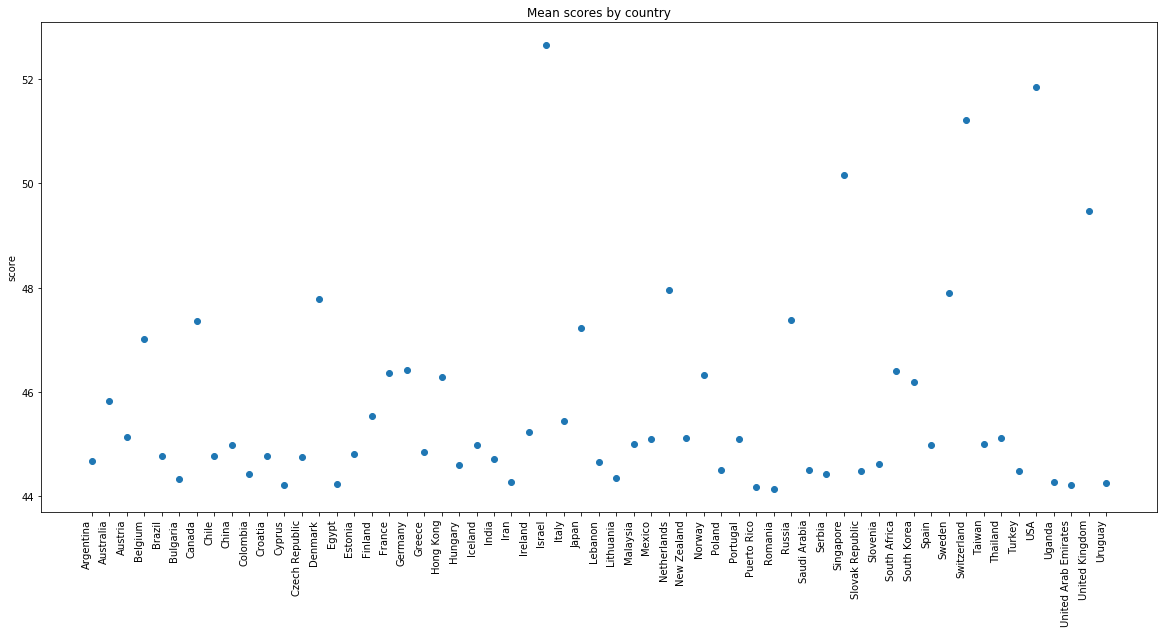

In [53]:
fig,ax = plt.subplots(figsize=(20,10))

plt.scatter(group['country'],group['score'])
fig.autofmt_xdate(rotation=90)
plt.ylabel('score')
plt.title('Mean scores by country')
plt.show()

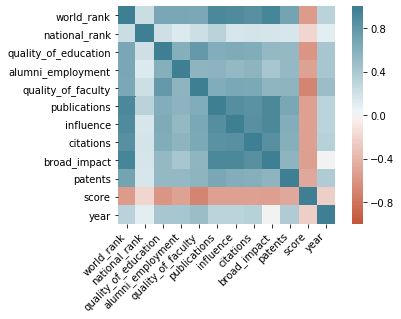

In [54]:
corr = cwur.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

# Shanghai Data World University Ranking Analysis

In [55]:
sha=pd.read_csv(r'file:///C:\Users\utilisateur\Downloads\world-university-rankings\shanghaiData.csv',engine='python')

In [56]:
sha.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4897 entries, 0 to 4896
Data columns (total 11 columns):
world_rank         4897 non-null object
university_name    4896 non-null object
national_rank      4896 non-null object
total_score        1101 non-null float64
alumni             4896 non-null float64
award              4895 non-null float64
hici               4895 non-null float64
ns                 4875 non-null float64
pub                4895 non-null float64
pcp                4895 non-null float64
year               4897 non-null int64
dtypes: float64(7), int64(1), object(3)
memory usage: 420.9+ KB


In [57]:
sha.head()

,world_rank,university_name,national_rank,total_score,alumni,award,hici,ns,pub,pcp,year
0,1,Harvard University,1,100.0,100.0,100.0,100.0,100.0,100.0,72.4,2005
1,2,University of Cambridge,1,73.6,99.8,93.4,53.3,56.6,70.9,66.9,2005
2,3,Stanford University,2,73.4,41.1,72.2,88.5,70.9,72.3,65.0,2005
3,4,"University of California, Berkeley",3,72.8,71.8,76.0,69.4,73.9,72.2,52.7,2005
4,5,Massachusetts Institute of Technology (MIT),4,70.1,74.0,80.6,66.7,65.8,64.3,53.0,2005


In [58]:
sha.describe()

,total_score,alumni,award,hici,ns,pub,pcp,year
count,1101.000000,4896.000000,4895.00000,4895.000000,4875.000000,4895.000000,4895.000000,4897.000000
mean,36.383470,9.161724,7.69191,16.221491,16.078503,38.254648,21.242329,2009.658566
std,13.557186,14.140636,15.49411,14.382710,12.511529,13.050809,9.254351,3.197576
min,23.500000,0.000000,0.00000,0.000000,0.000000,7.300000,8.300000,2005.000000
25%,27.400000,0.000000,0.00000,7.300000,8.000000,28.900000,15.600000,2007.000000
50%,31.300000,0.000000,0.00000,12.600000,12.800000,36.000000,19.000000,2009.000000
75%,41.800000,15.600000,13.40000,21.700000,19.800000,45.300000,24.500000,2012.000000
max,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000,100.000000,2015.000000


In [59]:
sha[sha==np.inf]=np.nan
sha.fillna(0, inplace=True)
sha

,world_rank,university_name,national_rank,total_score,alumni,award,hici,ns,pub,pcp,year
0,1,Harvard University,1,100.0,100.0,100.0,100.0,100.0,100.0,72.4,2005
1,2,University of Cambridge,1,73.6,99.8,93.4,53.3,56.6,70.9,66.9,2005
2,3,Stanford University,2,73.4,41.1,72.2,88.5,70.9,72.3,65.0,2005
3,4,"University of California, Berkeley",3,72.8,71.8,76.0,69.4,73.9,72.2,52.7,2005
4,5,Massachusetts Institute of Technology (MIT),4,70.1,74.0,80.6,66.7,65.8,64.3,53.0,2005
5,6,California Institute of Technology,5,67.1,59.2,68.6,59.8,65.8,52.5,100.0,2005
6,7,Columbia University,6,62.3,79.4,60.6,56.1,54.2,69.5,45.4,2005
7,8,Princeton University,7,60.9,63.4,76.8,60.9,48.7,48.5,59.1,2005
8,9,University of Chicago,8,60.1,75.6,81.9,50.3,44.7,56.4,42.2,2005
9,10,University of Oxford,2,59.7,64.3,59.1,48.4,55.6,68.4,53.2,2005


In [60]:
x2=sha[['alumni','award','hici','ns','pub','pcp']]
y2=sha['total_score']

In [61]:
import sklearn
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(x2, y2)
reg.score(x2, y2)


0.8745244321430461

In [62]:
coef=reg.coef_
intercept=reg.intercept_

intercept

-12.79473511364173

In [63]:
coef

array([ 0.14832819,  0.37293829,  0.31105207,  0.21309329,  0.21773711,
       -0.00149598])

In [64]:
test=['51.4','28.3','41.6','52.2','67.7','24.9']
test1=np.array(test).reshape(1,-1).astype(np.float64)
reg.predict(test1)

array([44.15027549])

In [65]:
test1=intercept+51.4*coef[0]+28.3*coef[1]+41.6*coef[2]+52.2*coef[3]+67.7*coef[4]+24.9*coef[5]
test1

44.15027549100347

In [66]:
from sklearn.model_selection import train_test_split
xTrain, xTest, yTrain, yTest = train_test_split(x2, y2, test_size = 0.2, random_state = 0)

In [67]:
reg = LinearRegression().fit(xTrain, yTrain)
reg.score(xTrain, yTrain)

0.8718779823606227

In [68]:
yhat=reg.predict(xTest)
reg.score(xTest, yTest)

0.8837400382329775

Text(0, 0.5, 'Predictions')

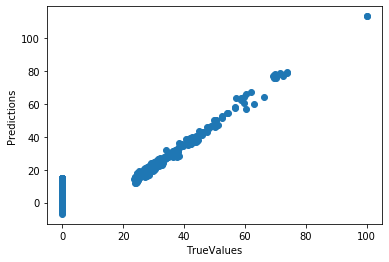

In [69]:
plt.scatter(yTest,yhat)
plt.xlabel('TrueValues')
plt.ylabel('Predictions')

In [70]:
features = ['alumni','award','hici','ns','pub','pcp']
target = 'total_score'
from scipy.stats.stats import pearsonr
for feature in features:
    coeff = pearsonr(sha[feature], sha[target])[0]
    print (('Pearson correlation for ') + feature + (' coeff: ')+ str(coeff))

Pearson correlation for alumni coeff: 0.7632903725081404
Pearson correlation for award coeff: 0.8277605639899998
Pearson correlation for hici coeff: 0.8409477293237284
Pearson correlation for ns coeff: 0.8621191643435779
Pearson correlation for pub coeff: 0.6982004340818719
Pearson correlation for pcp coeff: 0.7410781219486409


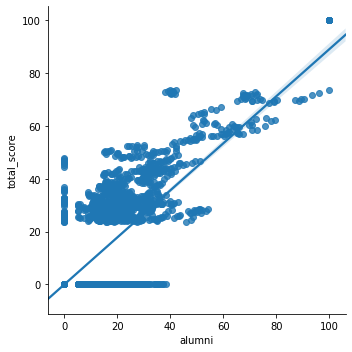

In [71]:
sns.lmplot(x="alumni", y="total_score", data=sha)

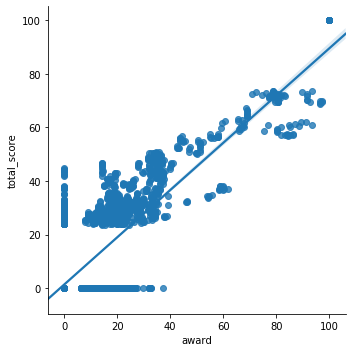

In [72]:
sns.lmplot(x="award", y="total_score", data=sha)

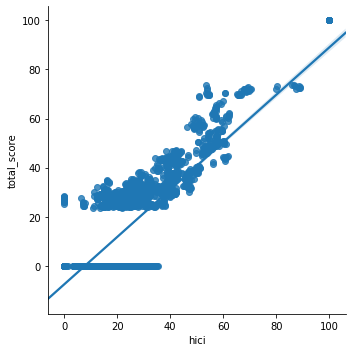

In [73]:
sns.lmplot(x="hici", y="total_score", data=sha)

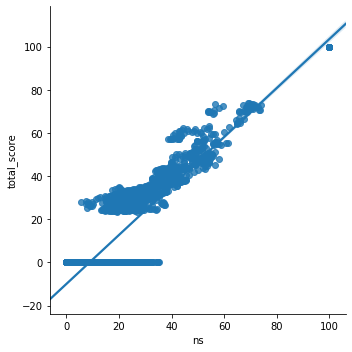

In [74]:
sns.lmplot(x="ns", y="total_score", data=sha)

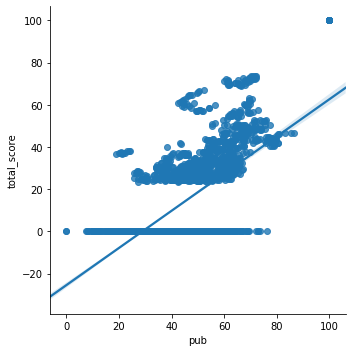

In [75]:
sns.lmplot(x="pub", y="total_score", data=sha)

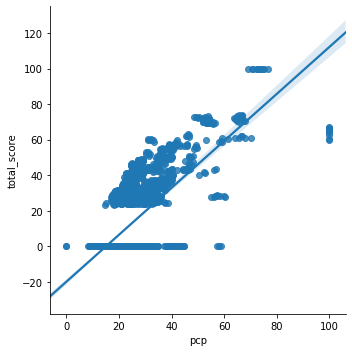

In [76]:
sns.lmplot(x="pcp", y="total_score", data=sha)

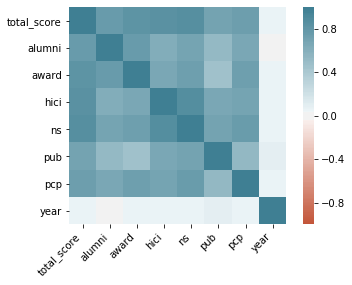

In [77]:
corr = sha.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [78]:
countr=pd.read_csv(r'file:///C:\Users\utilisateur\Downloads\world-university-rankings\school_and_country_table.csv')

In [79]:
countr.head()

,school_name,country
0,Harvard University,United States of America
1,California Institute of Technology,United States of America
2,Massachusetts Institute of Technology,United States of America
3,Stanford University,United States of America
4,Princeton University,United States of America


In [80]:
countr['score']=sha['total_score']

In [81]:
countr.head()

,school_name,country,score
0,Harvard University,United States of America,100.0
1,California Institute of Technology,United States of America,73.6
2,Massachusetts Institute of Technology,United States of America,73.4
3,Stanford University,United States of America,72.8
4,Princeton University,United States of America,70.1


In [82]:
country=countr[['country','score']]
group=country.groupby(['country'], as_index=False).mean()
group

,country,score
0,Argentina,0.000000
1,Australia,9.448387
2,Austria,7.728571
3,Bangladesh,0.000000
4,Belarus,0.000000
5,Belgium,0.000000
6,Brazil,1.517647
7,Canada,10.916000
8,Chile,4.533333
9,China,6.405263


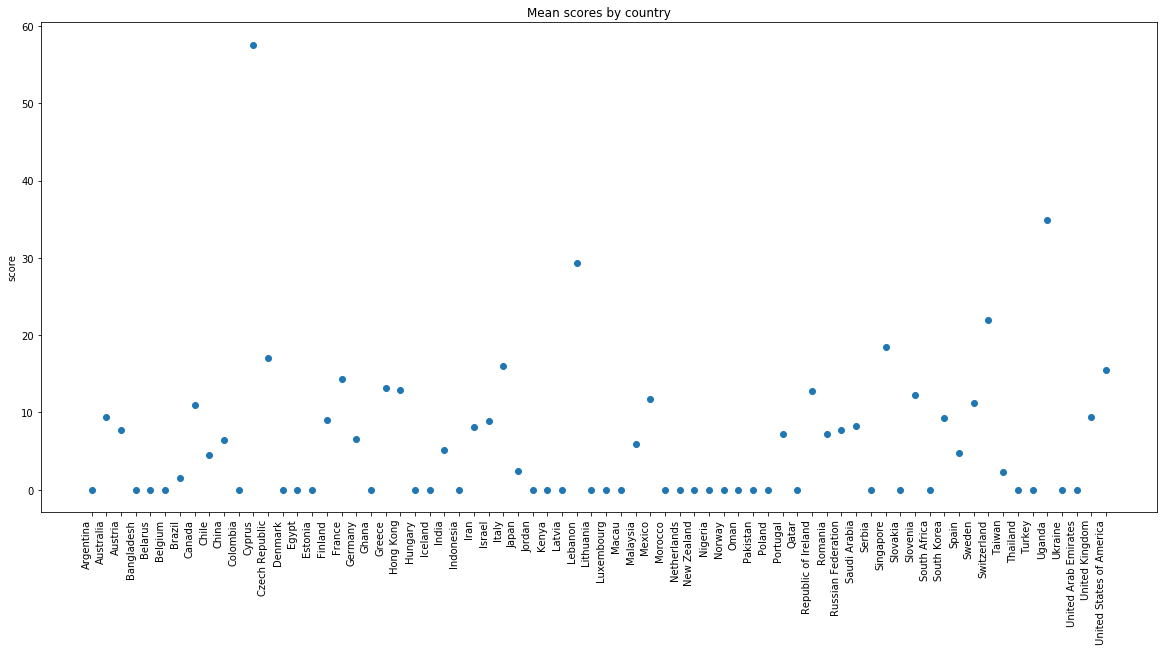

In [83]:
fig,ax = plt.subplots(figsize=(20,10))

plt.scatter(group['country'],group['score'])
fig.autofmt_xdate(rotation=90)
plt.ylabel('score')
plt.title('Mean scores by country')
plt.show()

# Education Expenditure by Countries Analysis

In [84]:
eda=pd.read_csv(r'file:///C:\Users\utilisateur\Downloads\world-university-rankings\education_expenditure_supplementary_data.csv',engine='python')

In [85]:
eda.head(1000)

,country,institute_type,direct_expenditure_type,1995,2000,2005,2009,2010,2011
0,OECD Average,All Institutions,Public,4.9,4.9,5.0,5.4,5.4,5.3
1,Australia,All Institutions,Public,4.5,4.6,4.3,4.5,4.6,4.3
2,Austria,All Institutions,Public,5.3,5.4,5.2,5.7,5.6,5.5
3,Belgium,All Institutions,Public,5.0,5.1,5.8,6.4,6.4,6.4
4,Canada,All Institutions,Public,5.8,5.2,4.8,5.0,5.2,NaN
5,Chile,All Institutions,Public,NaN,4.2,3.3,4.1,4.3,3.9
6,Czech Republic,All Institutions,Public,4.8,4.2,4.1,4.2,4.1,4.4
7,Denmark,All Institutions,Public,6.5,6.4,6.8,7.5,7.6,7.5
8,Estonia,All Institutions,Public,NaN,NaN,4.7,5.9,5.6,5.2
9,Finland,All Institutions,Public,6.6,5.5,5.9,6.3,6.4,6.3


In [86]:
eda=eda.fillna(0)
eda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333 entries, 0 to 332
Data columns (total 9 columns):
country                    333 non-null object
institute_type             333 non-null object
direct_expenditure_type    333 non-null object
1995                       333 non-null float64
2000                       333 non-null float64
2005                       333 non-null float64
2009                       333 non-null float64
2010                       333 non-null float64
2011                       333 non-null float64
dtypes: float64(6), object(3)
memory usage: 23.5+ KB


In [87]:
expen=eda[['country','institute_type','direct_expenditure_type','2011']]
expen.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333 entries, 0 to 332
Data columns (total 4 columns):
country                    333 non-null object
institute_type             333 non-null object
direct_expenditure_type    333 non-null object
2011                       333 non-null float64
dtypes: float64(1), object(3)
memory usage: 10.5+ KB


In [88]:

expen=expen[expen['direct_expenditure_type'].str[0] == "T"]

In [89]:
expen=expen[expen['institute_type'].str[0] == "A"]

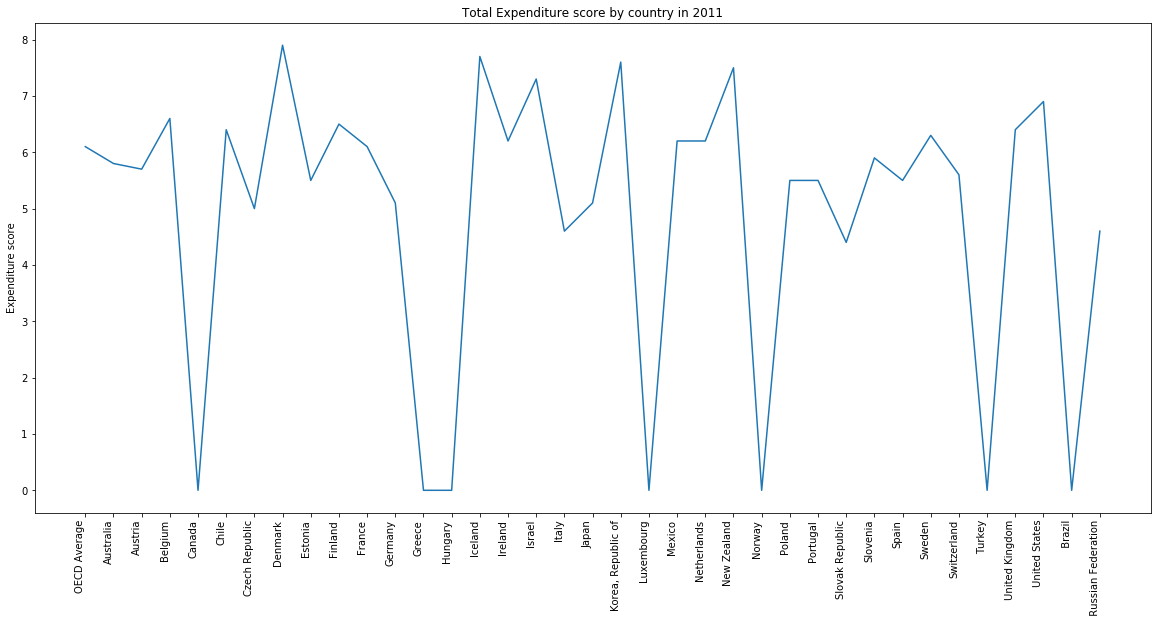

In [90]:
x=expen['country']
y=expen['2011']
fig,ax = plt.subplots(figsize=(20,10))
plt.plot(x,y)
fig.autofmt_xdate(rotation=90)
plt.ylabel('Expenditure score')
plt.title('Total Expenditure score by country in 2011')
plt.show()





In [91]:
expenall=eda[['country','institute_type','direct_expenditure_type','1995','2000','2005','2009','2010','2011']]
expenall.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333 entries, 0 to 332
Data columns (total 9 columns):
country                    333 non-null object
institute_type             333 non-null object
direct_expenditure_type    333 non-null object
1995                       333 non-null float64
2000                       333 non-null float64
2005                       333 non-null float64
2009                       333 non-null float64
2010                       333 non-null float64
2011                       333 non-null float64
dtypes: float64(6), object(3)
memory usage: 23.5+ KB


In [92]:
expenall=expenall[expenall['direct_expenditure_type'].str[1] == "u"]

In [93]:
expenall=expenall[expenall['institute_type'].str[0] == "A"]

In [94]:
expenall

,country,institute_type,direct_expenditure_type,1995,2000,2005,2009,2010,2011
0,OECD Average,All Institutions,Public,4.9,4.9,5.0,5.4,5.4,5.3
1,Australia,All Institutions,Public,4.5,4.6,4.3,4.5,4.6,4.3
2,Austria,All Institutions,Public,5.3,5.4,5.2,5.7,5.6,5.5
3,Belgium,All Institutions,Public,5.0,5.1,5.8,6.4,6.4,6.4
4,Canada,All Institutions,Public,5.8,5.2,4.8,5.0,5.2,0.0
5,Chile,All Institutions,Public,0.0,4.2,3.3,4.1,4.3,3.9
6,Czech Republic,All Institutions,Public,4.8,4.2,4.1,4.2,4.1,4.4
7,Denmark,All Institutions,Public,6.5,6.4,6.8,7.5,7.6,7.5
8,Estonia,All Institutions,Public,0.0,0.0,4.7,5.9,5.6,5.2
9,Finland,All Institutions,Public,6.6,5.5,5.9,6.3,6.4,6.3


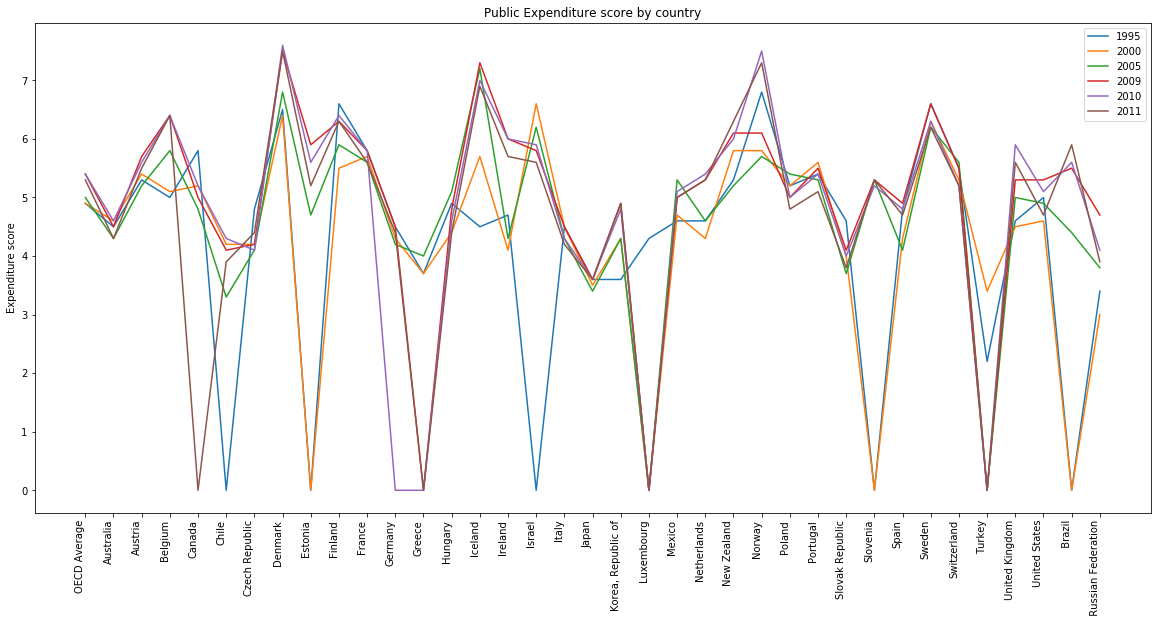

In [95]:
x1=expenall['country']
y1=expenall['1995']
fig,ax = plt.subplots(figsize=(20,10))
plt.plot(x1,y1,label=1995)
y2=expenall['2000']
y3=expenall['2005']
y4=expenall['2009']
y5=expenall['2010']
y6=expenall['2011']
plt.plot(x1,y2,label=2000)
plt.plot(x1,y3,label=2005)
plt.plot(x1,y4,label=2009)
plt.plot(x1,y5,label=2010)
plt.plot(x1,y6,label=2011)
fig.autofmt_xdate(rotation=90)
plt.ylabel('Expenditure score')
plt.title('Public Expenditure score by country')
plt.legend()
plt.show()

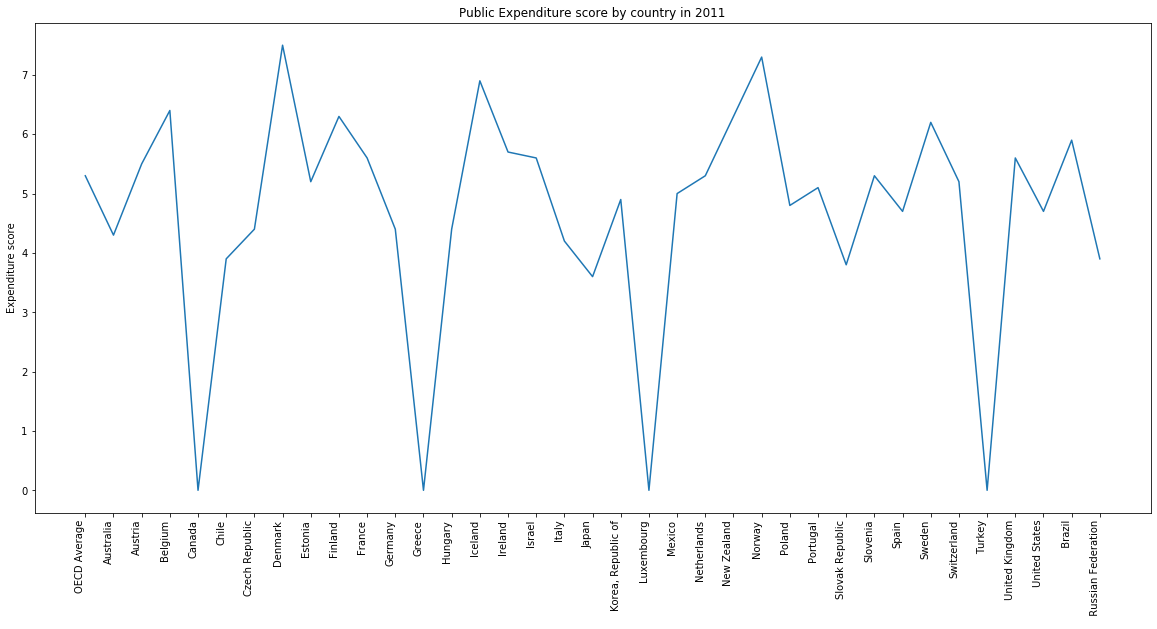

In [96]:
fig,ax = plt.subplots(figsize=(20,10))
plt.plot(x1,y6)
fig.autofmt_xdate(rotation=90)
plt.ylabel('Expenditure score')
plt.title('Public Expenditure score by country in 2011')
plt.show()

In [97]:
expenall=eda[['country','institute_type','direct_expenditure_type','1995','2000','2005','2009','2010','2011']]
expenall.info()
expenall=expenall[expenall['direct_expenditure_type'].str[1] == "r"]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333 entries, 0 to 332
Data columns (total 9 columns):
country                    333 non-null object
institute_type             333 non-null object
direct_expenditure_type    333 non-null object
1995                       333 non-null float64
2000                       333 non-null float64
2005                       333 non-null float64
2009                       333 non-null float64
2010                       333 non-null float64
2011                       333 non-null float64
dtypes: float64(6), object(3)
memory usage: 23.5+ KB


In [98]:
expenall=expenall[expenall['institute_type'].str[0] == "A"]

In [99]:
expenall

,country,institute_type,direct_expenditure_type,1995,2000,2005,2009,2010,2011
111,OECD Average,All Institutions,Private,0.0,0.0,0.0,0.0,0.0,0.9
112,Australia,All Institutions,Private,0.0,0.0,0.0,0.0,0.0,1.5
113,Austria,All Institutions,Private,0.0,0.0,0.0,0.0,0.0,0.2
114,Belgium,All Institutions,Private,0.0,0.0,0.0,0.0,0.0,0.2
115,Canada,All Institutions,Private,0.0,0.0,0.0,0.0,0.0,0.0
116,Chile,All Institutions,Private,0.0,0.0,0.0,0.0,0.0,2.5
117,Czech Republic,All Institutions,Private,0.0,0.0,0.0,0.0,0.0,0.6
118,Denmark,All Institutions,Private,0.0,0.0,0.0,0.0,0.0,0.4
119,Estonia,All Institutions,Private,0.0,0.0,0.0,0.0,0.0,0.3
120,Finland,All Institutions,Private,0.0,0.0,0.0,0.0,0.0,0.1


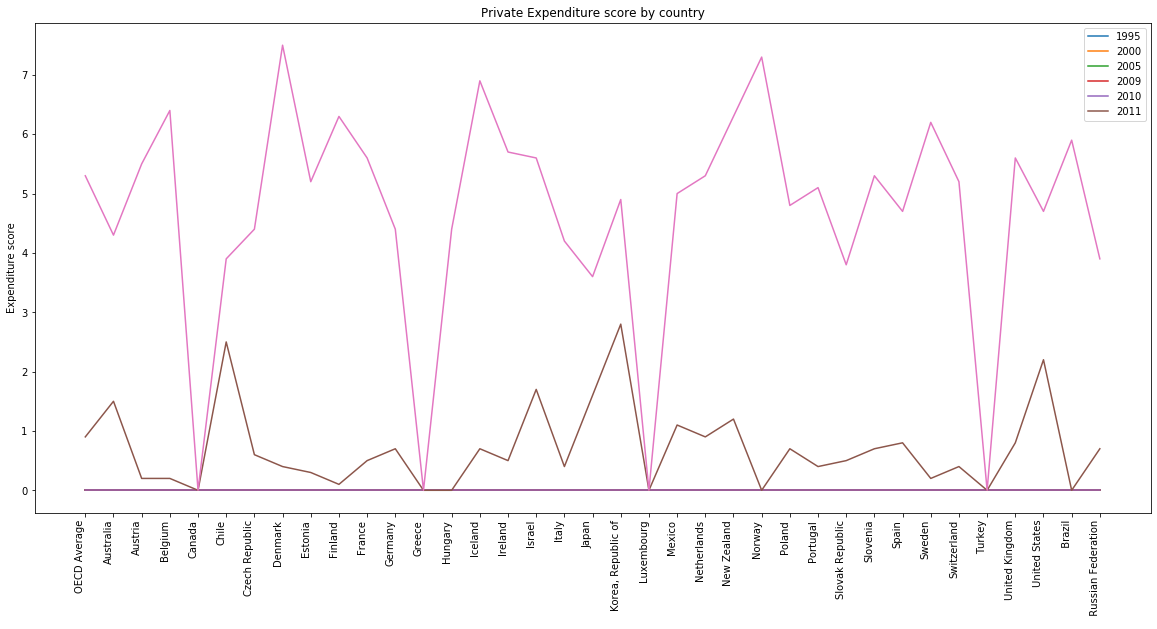

In [100]:
x11=expenall['country']
y11=expenall['1995']
fig,ax = plt.subplots(figsize=(20,10))
plt.plot(x11,y11,label=1995)
y21=expenall['2000']
y31=expenall['2005']
y41=expenall['2009']
y51=expenall['2010']
y61=expenall['2011']
plt.plot(x11,y21,label=2000)
plt.plot(x11,y31,label=2005)
plt.plot(x11,y41,label=2009)
plt.plot(x11,y51,label=2010)
plt.plot(x11,y61,label=2011)
plt.plot(x11,y6)

fig.autofmt_xdate(rotation=90)
plt.ylabel('Expenditure score')
plt.title('Private Expenditure score by country')
plt.legend()
plt.show()

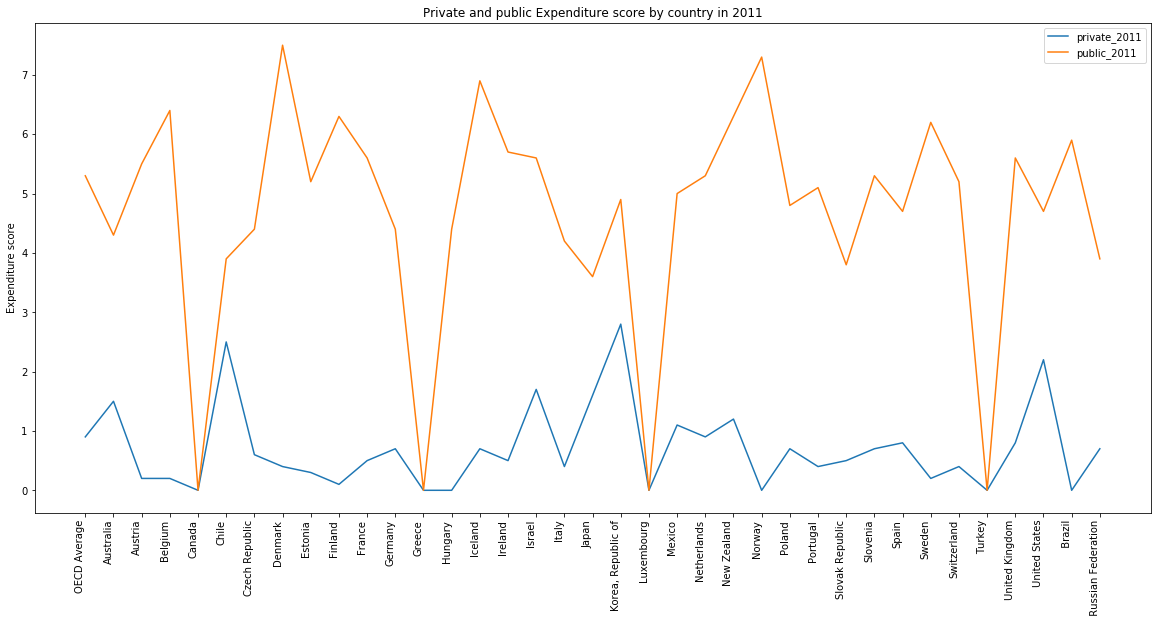

In [101]:
fig,ax = plt.subplots(figsize=(20,10))
plt.plot(x11,y61,label='private_2011')
plt.plot(x11,y6,label= 'public_2011')
fig.autofmt_xdate(rotation=90)
plt.ylabel('Expenditure score')
plt.title('Private and public Expenditure score by country in 2011')
plt.legend()
plt.show()